# Investigation of the problem of detection of Diabetic Retinopathy using Machine Learning
![DR](DR.png)




## Introduction:
Diabetic retinopathy (DR) is a consequence of diabetes which manifests itself in the retina. DR is a major cause of visual impairment globally. In 2011, 366 million people were diagnosed with diabetes and a further 280 million people were at risk of developing it. Approximately 40% of diabetic patients suffer from DR. 

## Resources: 
The dataset can be found [here](http://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set)

I took the title image from [here](https://www.ophthalytics.com/wp-content/uploads/2021/08/Copy-of-WEBSITE-CONTENT-1536x878.png)

### Attributes:
- (0) The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.
- (1) The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack.
- (2-7) The results of MA detection. Each feature value stand for the number of MAs found at the confidence levels alpha = 0.5, . . . , 1, respectively.
- (8-15) contain the same information as 2-7) for exudates. However, as exudates are represented by a set of points rather than the number of pixels constructing the lesions, these features are normalized by dividing the number of lesions with the diameter of the ROI to compensate different image sizes.
- (16) The euclidean distance of the center of the macula and the center of the optic disc to provide important information regarding the patients' condition. This feature is also normalized with the diameter of the ROI.
- (17) The diameter of the optic disc.
- (18) The binary result of the AM/FM-based classification.
- (19) Class label. 1 = contains signs of DR (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR.

## Aim
- To produce a machine learning system for the detection of signs of DR. The system will be  trained and tested on The Diabetic Retinopathy Debrecen Data Set Data Set. 
- To write a research report on the background, rationale, development, implementation, evaluation and conclusions of your machine learning system. 

## Problem Statement:
Machine Learning has the potential to support the development of innovative solutions for improved real-life and real-time healthcare delivery. For this coursework, your aim is to investigate the problem of detection of DR using machine learning. In doing so, you would be expected to perform the following tasks:
- Investigate the Diabetic Retinopathy Debrecen Dataset, and develop basic understanding of the significance and meaning of data attributes and features
- Develop pre-processing and/or feature extraction techniques (if needed)
- Develop and Implement (using Python or Matlab) a machine learning system that can be implemented to demonstrate your ideas 
- Demonstrate the feasibility of your design by evaluating your system using machine learning metrics
- Discuss your findings making recommendations for further investigation and improved implementation.
Write a 1000 words report to present your work and findings


---

In [1]:
# Importing general purpose Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing ML libraries
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, PowerTransformer, QuantileTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score,precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier,LocalOutlierFactor
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC                   
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.feature_selection import RFE, RFECV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import confusion_matrix

In [2]:
# Reading in the dataset
data = pd.read_csv('data.csv')
data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


---
## Data Exploration
*Investigate the Diabetic Retinopathy Debrecen Dataset, and develop basic understanding of the significance and meaning of data attributes and features*

In [3]:
# shape of the data
data.shape

(1150, 20)

In [4]:
# Frequency table against the target variable
print('Column T, our target variable')
data['T'].value_counts()

Column T, our target variable


1    611
0    539
Name: T, dtype: int64

In [5]:
# Information about columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1150 non-null   int64  
 1   B       1150 non-null   int64  
 2   C       1150 non-null   int64  
 3   D       1150 non-null   int64  
 4   E       1150 non-null   int64  
 5   F       1150 non-null   int64  
 6   G       1150 non-null   int64  
 7   H       1150 non-null   int64  
 8   I       1150 non-null   float64
 9   J       1150 non-null   float64
 10  K       1150 non-null   float64
 11  L       1150 non-null   float64
 12  M       1150 non-null   float64
 13  N       1150 non-null   float64
 14  O       1150 non-null   float64
 15  P       1150 non-null   float64
 16  Q       1150 non-null   float64
 17  R       1150 non-null   float64
 18  S       1150 non-null   int64  
 19  T       1150 non-null   int64  
dtypes: float64(10), int64(10)
memory usage: 179.8 KB


In [6]:
# Summary Statistics
data.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000
mean,0.996522,0.918261,38.455652,36.935652,35.165217,32.319130,28.766087,21.165217,64.092042,23.101974,8.710657,1.838046,0.561207,0.212467,0.085749,0.037258,0.523184,0.108448,0.336522,0.531304
std,0.058900,0.274086,25.615270,24.099938,22.800199,21.110754,19.507158,15.100609,58.510523,21.606898,11.570802,3.924575,2.485141,1.057569,0.398883,0.179033,0.028051,0.017943,0.472725,0.499236
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000,0.000000
25%,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.268987,7.944090,1.242384,0.081871,0.000000,0.000000,0.000000,0.000000,0.502843,0.095824,0.000000,0.000000
50%,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.233267,17.041567,4.433600,0.484892,0.022323,0.001551,0.000000,0.000000,0.523277,0.106624,0.000000,1.000000
75%,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.839132,31.310584,11.775557,1.925969,0.192363,0.038503,0.004834,0.003851,0.543583,0.119633,1.000000,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000,1.000000


In [7]:
# Frequency table for each column
for col in data.columns:
    print(data[col].value_counts())

1    1146
0       4
Name: A, dtype: int64
1    1056
0      94
Name: B, dtype: int64
16     37
12     29
17     27
19     26
15     24
       ..
126     1
101     1
93      1
83      1
147     1
Name: C, Length: 110, dtype: int64
15     35
16     28
13     27
14     26
12     26
       ..
131     1
92      1
110     1
130     1
132     1
Name: D, Length: 104, dtype: int64
13     39
16     30
9      26
11     26
12     26
       ..
80      1
98      1
100     1
93      1
113     1
Name: E, Length: 99, dtype: int64
11    36
9     33
13    32
12    31
14    30
      ..
89     1
94     1
98     1
92     1
82     1
Name: F, Length: 91, dtype: int64
11    41
10    41
12    35
8     32
7     32
      ..
76     1
79     1
86     1
75     1
97     1
Name: G, Length: 84, dtype: int64
9     55
8     54
5     51
6     43
4     43
      ..
89     1
56     1
77     1
65     1
68     1
Name: H, Length: 69, dtype: int64
26.723328    2
6.193941     2
26.347993    2
15.871188    2
66.751648    2
        

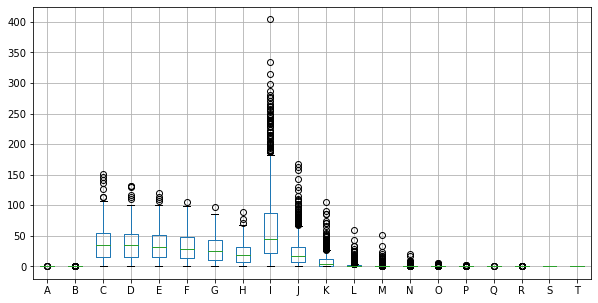

In [8]:
# Box Plot
plt.figure(figsize=(10,5))
data.boxplot()
plt.show()

<Figure size 720x360 with 0 Axes>

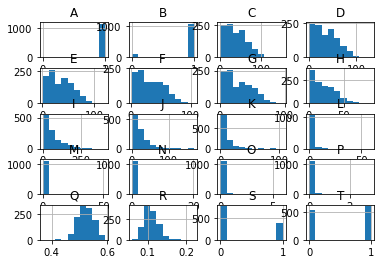

In [9]:
# Hist plot
plt.figure(figsize=(10,5))
data.hist()
plt.show()

- The following obervations can be made
    1. There are hints of the presence of some categorical variables
    2. Apart from a couple of features, none of the features look like Gaussian
    3. Apparently there are outliers (I am not sure as of now that whether they are the outliers OR that's how our data is)
---

## Data Cleaning
*Develop pre-processing and/or feature extraction techniques (if needed)*

In [10]:
# Do we have any null values 
data.isnull().sum().sum()

0

In [11]:
# Do we have any duplicates
data.duplicated().sum()

5

In [12]:
# Removing duplicate rows
data = data.drop_duplicates()

# After removal
data.shape

(1145, 20)

#### Identifying and treating Outliers

In [13]:
def outliers_iqr(df, col, thresh):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q1 + thresh*IQR
    lower_bound = Q3 - thresh*IQR
    
    ls = df.index[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return ls

thresh = np.arange(0,75,5)
for t in thresh:
    index_list = []
    for col in data.columns:
        index_list.extend(outliers_iqr(data, col, t))
    print('With thresh at {}, I got {} rows as outliers and lose them'.format(t, len(set(index_list))))

With thresh at 0, I got 1145 rows as outliers and lose them
With thresh at 5, I got 302 rows as outliers and lose them
With thresh at 10, I got 252 rows as outliers and lose them
With thresh at 15, I got 234 rows as outliers and lose them
With thresh at 20, I got 220 rows as outliers and lose them
With thresh at 25, I got 208 rows as outliers and lose them
With thresh at 30, I got 196 rows as outliers and lose them
With thresh at 35, I got 185 rows as outliers and lose them
With thresh at 40, I got 178 rows as outliers and lose them
With thresh at 45, I got 172 rows as outliers and lose them
With thresh at 50, I got 168 rows as outliers and lose them
With thresh at 55, I got 166 rows as outliers and lose them
With thresh at 60, I got 163 rows as outliers and lose them
With thresh at 65, I got 162 rows as outliers and lose them
With thresh at 70, I got 159 rows as outliers and lose them


In [14]:
def remove_outliers(df, t):
    index_list = []
    for col in data.columns:
        index_list.extend(outliers_iqr(data, col, t))
    ls = sorted(set(index_list))
    df.drop(index_list, axis=0, inplace=True)
    return df
    

- Identification of the Outliers can be a bit complex here, demanding domain knowledge. I tried using maximum thresh, but it did not improve my scores. So I left it here 

#### Towards Feature Exploration 

In [15]:
# Do I have any feature of zer-variance
(data.nunique() <= 1).any()

False

In [16]:
# lets look for the cardinality of the features
for col in data.columns:
    num_unique = len(data[col].unique())
    total = data.shape[0]
    print(col, num_unique)

A 2
B 2
C 110
D 104
E 99
F 91
G 84
H 69
I 1140
J 1140
K 1129
L 1031
M 794
N 578
O 415
P 351
Q 1131
R 1109
S 2
T 2


<AxesSubplot:>

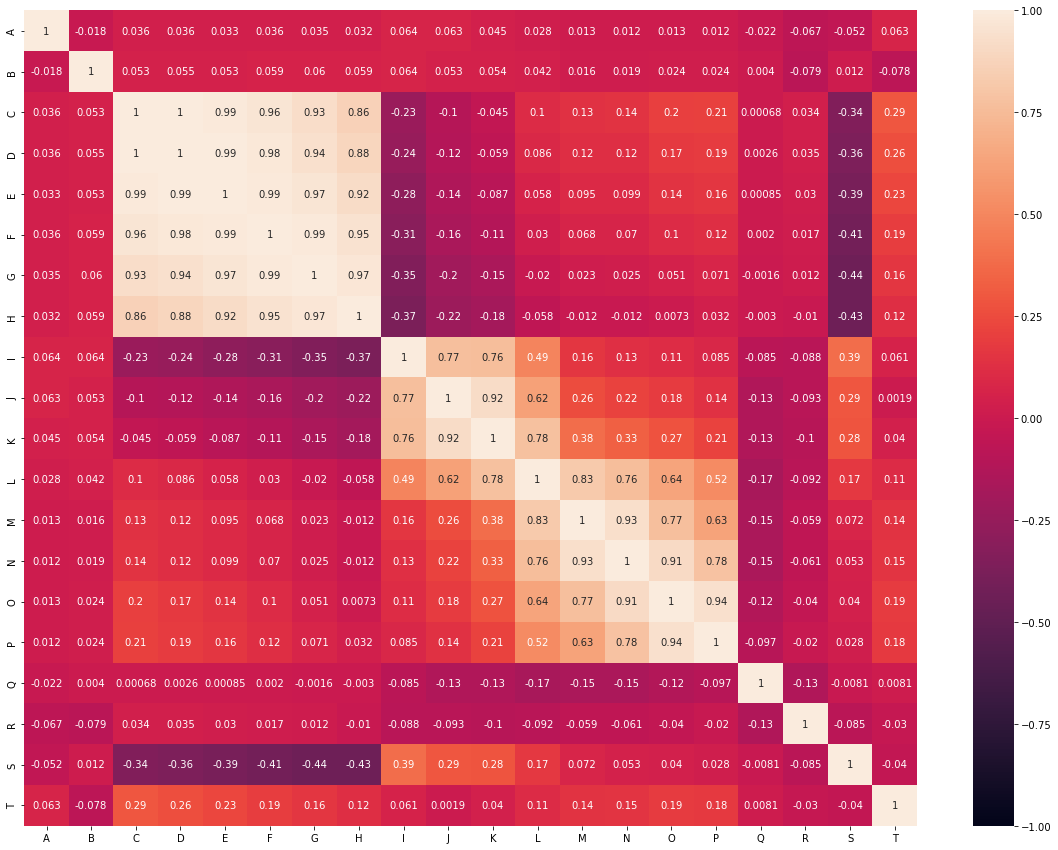

In [17]:
# Do I have MultiCollinearity in our Dataset
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)

- Indeed there are some signs of severe Multi-Collinearity. 
- Suspected Columns are 
1. `C`, `D`, `E`, `F`, `G`, `H`.
2. `I`, `J`, `K`, `L`.
3. `M`, `N`
4. `O`, `P`


Lets also check the Variance Inflation Factors

In [18]:
# Computing VIF
# the independent variables set
X = data.iloc[:, :-1]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
  
# calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

   feature          VIF
0        A   175.932296
1        B    12.211843
2        C   629.428585
3        D  1575.694697
4        E  1545.434444
5        F   885.535679
6        G   406.339650
7        H    80.380612
8        I     7.239366
9        J    17.927915
10       K    30.934780
11       L    22.056749
12       M    17.423547
13       N    25.369772
14       O    30.411699
15       P    13.302634
16       Q   170.635142
17       R    34.554351
18       S     2.073901


- Lets consider removing all the columns with high VIFs and linear collinearity except `H`, `L`, `N`,and `O`

In [19]:
# data1 : Without the following columns
data1 = data.drop(['C', 'D', 'E', 'F', 'G', 'I', 'J', 'K', 'N', 'O'], axis=1)

In [20]:
# Lets use RFE on data1
for n_cols in range(len(data1.columns)):
    X = data1.iloc[:,:-1]
    y = data1.iloc[:,-1]
    # create pipeline
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=n_cols)
    model = LogisticRegression()
    pipeline = Pipeline(steps=[('s',rfe),('m',model)])
    # evaluate model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('Num of Features: {}\nAccuracy Score: {}'.format(n_cols,np.mean(n_scores)))

Num of Features: 0
Accuracy Score: nan
Num of Features: 1
Accuracy Score: 0.5292524790236461
Num of Features: 2
Accuracy Score: 0.532743452834986
Num of Features: 3
Accuracy Score: 0.5880574624968219
Num of Features: 4
Accuracy Score: 0.5805034324942792
Num of Features: 5
Accuracy Score: 0.5808110856852277
Num of Features: 6
Accuracy Score: 0.5703381642512079
Num of Features: 7
Accuracy Score: 0.5784769895753877
Num of Features: 8
Accuracy Score: 0.5819832189168573
Num of Features: 9
Accuracy Score: 0.5983269768624458


- It can be seen that the accuracy is badly impacted by the removal of columns using RFE technique.

Lets try calculating the accuracies on the data without feature selection

In [21]:
# Using RFE on data
for n_cols in range(len(data.columns)):
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]
    # create pipeline
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=n_cols)
    model = LogisticRegression()
    pipeline = Pipeline(steps=[('s',rfe),('m',model)])
    # evaluate model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('Num of Features: {}\nAccuracy Score: {}'.format(n_cols,np.mean(n_scores)))

Num of Features: 0
Accuracy Score: nan
Num of Features: 1
Accuracy Score: 0.5909763539282992
Num of Features: 2
Accuracy Score: 0.5950800915331809
Num of Features: 3
Accuracy Score: 0.6014594457157385
Num of Features: 4
Accuracy Score: 0.662001017035342
Num of Features: 5
Accuracy Score: 0.714096109839817
Num of Features: 6
Accuracy Score: 0.7380116959064328
Num of Features: 7
Accuracy Score: 0.7406229341469618
Num of Features: 8
Accuracy Score: 0.744701245868294
Num of Features: 9
Accuracy Score: 0.744980930587338
Num of Features: 10
Accuracy Score: 0.742051868802441
Num of Features: 11
Accuracy Score: 0.7458555809814392
Num of Features: 12
Accuracy Score: 0.7461352657004833
Num of Features: 13
Accuracy Score: 0.7426493770658532
Num of Features: 14
Accuracy Score: 0.7435291126366642
Num of Features: 15
Accuracy Score: 0.740610221205187
Num of Features: 16
Accuracy Score: 0.7461454360539028
Num of Features: 17
Accuracy Score: 0.7452631578947368
Num of Features: 18
Accuracy Score: 0.749

- The previous accuracies have been retained. To me, it seems like using RFE led us lose some of the columns that are contributing a lot to the model's performance.

Lets rather use Dimension Reduction, and see what I can have there
#### Dimension Reduction 

Features: 1, Accuracy: 0.49728705822527336
Features: 2, Accuracy: 0.5974091024663107
Features: 3, Accuracy: 0.602044241037376
Features: 4, Accuracy: 0.6829519450800915
Features: 5, Accuracy: 0.6820772946859903
Features: 6, Accuracy: 0.6841088227815917
Features: 7, Accuracy: 0.7085812356979404
Features: 8, Accuracy: 0.7324434274091023
Features: 9, Accuracy: 0.7452707856598016
Features: 10, Accuracy: 0.744973302822273
Features: 11, Accuracy: 0.7467175184337655
Features: 12, Accuracy: 0.7472870582252733
Features: 13, Accuracy: 0.7516450546656496
Features: 14, Accuracy: 0.7472921434019834
Features: 15, Accuracy: 0.7484591914569031
Features: 16, Accuracy: 0.7472972285786932
Features: 17, Accuracy: 0.7472972285786932
Features: 18, Accuracy: 0.7475870836511568
Features: 19, Accuracy: 0.7472896008136283
Features: 20, Accuracy: nan


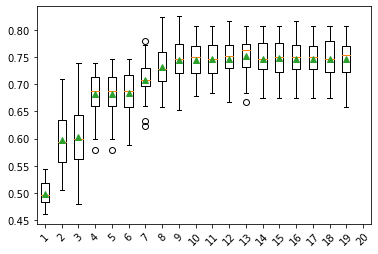

In [22]:
# Towards Dimension Reduction
# get the dataset
def get_dataset():
    X, y = data.iloc[:,:-1], data.iloc[:, -1]
    return X, y

# get a list of models to evaluate
def get_models(technique):
    models = dict()
    
    for i in range(1,21):
        if technique == 'PCA':
            steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        elif technique == 'SVD':
            steps = [('svd', TruncatedSVD(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models('PCA')
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('Features: {}, Accuracy: {}'.format(name, np.mean(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()

- Again there is a same pattern of performance. The dataset produces the best accuracies when all the features are involved.

## Building and Evaluating Model
*Demonstrate the feasibility of your design by evaluating your system using machine learning metrics*

Here I will develop two functions. Both will use pipeline. One will use Cross_val_score to average the scores. While the other will use train_test_split and generate a report with Confusion matrix and other metrices

In [23]:
# train_and_test returns cross validated scores
def train_and_test(df,step):
    ndata = df.values
    # features
    X = ndata[:, :-1]
    # labels
    y = ndata[:, -1]
    # Pipeline Initialization
    pipeline = Pipeline(steps=step)
    # Cross Validation (Repeated Stratified)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # Scores
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    # Print
    print('\n')
    print('Steps taken:\n {}'.format(pipeline.steps))
    print('\n')
    print('Avg Accuracy: {:.2f}\nStandard Deviation: {:.2f}'.format(np.mean(scores), np.std(scores)))
    
# train_and_test_final evalates the model    
def train_and_test_final(df,step):
    ndata = df.values
    # features
    X = ndata[:, :-1]
    # labels
    y = ndata[:, -1]
    # Split the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3)
    # Pipeline Initialization
    pipeline = Pipeline(steps=step)
    # Fit the pipeline
    pipeline.fit(X_train, y_train)
    # Make Predicions
    y_pred =  pipeline.predict(X_test)
    # Calculating confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    # Calculating Accuracy Scores
    accuracy = accuracy_score(y_test, y_pred)
    # Plotting the matrix
    plot_confusion_matrix(pipeline, X_test, y_test)
    # Precision, recall, f-score 
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)
    # Print 
    print(pipeline.steps)
    print('-'*60)
    print('The Accuracy score is: ',accuracy)
    print('-'*60)
    print('\n')
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))

#### Logistic Regression

<font color = 'grey'> Please note that I will be using `data1` instead of `data` because Logistic Regression model has an assumption that there is near null Collinearity in the dataset. `data1` is just a variant of data that does not contain the columns inducing collinearity

In [24]:
step_lr_svd18 = [
    ('transformer', QuantileTransformer(n_quantiles=90, output_distribution='normal')),
    ('Dimension_Reduction', TruncatedSVD(n_components=8)), 
    ('model',LogisticRegression())]
train_and_test(data1,step_lr_svd18)



Steps taken:
 [('transformer', QuantileTransformer(n_quantiles=90, output_distribution='normal')), ('Dimension_Reduction', TruncatedSVD(n_components=8)), ('model', LogisticRegression())]


Avg Accuracy: 0.57
Standard Deviation: 0.04


In [25]:
step_lr_pca18 = [
        ('transformer', QuantileTransformer(n_quantiles=90, output_distribution='normal')),
        ('Dimension_Reduction', PCA(n_components=8)), 
        ('model',LogisticRegression())]
train_and_test(data1, step_lr_pca18)



Steps taken:
 [('transformer', QuantileTransformer(n_quantiles=90, output_distribution='normal')), ('Dimension_Reduction', PCA(n_components=8)), ('model', LogisticRegression())]


Avg Accuracy: 0.57
Standard Deviation: 0.04


In [26]:
step_lr_pt_pca18 = [
        ('transformer', PowerTransformer(method='yeo-johnson', standardize=True)),
        ('Dimension_Reduction', PCA(n_components=8)), 
        ('model',LogisticRegression())]
train_and_test(data1, step_lr_pt_pca18)



Steps taken:
 [('transformer', PowerTransformer()), ('Dimension_Reduction', PCA(n_components=8)), ('model', LogisticRegression())]


Avg Accuracy: 0.62
Standard Deviation: 0.04


[('transformer', PowerTransformer()), ('Dimension_Reduction', PCA(n_components=8)), ('model', LogisticRegression())]
------------------------------------------------------------
The Accuracy score is:  0.6104651162790697
------------------------------------------------------------


precision: [0.55276382 0.68965517]
recall: [0.70967742 0.52910053]
fscore: [0.62146893 0.5988024 ]
support: [155 189]


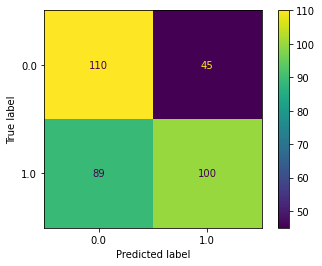

In [27]:
# lets evaluate
train_and_test_final(data1, step_lr_pt_pca18)

#### Naive Bayes


In [28]:
step_nb_pt_pca18 = [
        ('transformer', PowerTransformer(method='yeo-johnson')),
        ('Dimension_Reduction', PCA(n_components=18)), 
        ('model',GaussianNB())]

train_and_test(data, step_nb_pt_pca18)



Steps taken:
 [('transformer', PowerTransformer()), ('Dimension_Reduction', PCA(n_components=18)), ('model', GaussianNB())]


Avg Accuracy: 0.68
Standard Deviation: 0.04


In [29]:
step_nb_pt_svd18 = [
        ('transformer', PowerTransformer(method='yeo-johnson')),
        ('Dimension_Reduction', TruncatedSVD(n_components=18)), 
        ('model',GaussianNB())]

train_and_test(data, step_nb_pt_svd18)



Steps taken:
 [('transformer', PowerTransformer()), ('Dimension_Reduction', TruncatedSVD(n_components=18)), ('model', GaussianNB())]


Avg Accuracy: 0.68
Standard Deviation: 0.04


In [30]:
step_nb_qt_pca18 = [
        ('transformer', QuantileTransformer(n_quantiles=90, output_distribution='normal')),
        ('Dimension_Reduction', PCA(n_components=18)), 
        ('model',GaussianNB())]

train_and_test(data, step_nb_qt_pca18)



Steps taken:
 [('transformer', QuantileTransformer(n_quantiles=90, output_distribution='normal')), ('Dimension_Reduction', PCA(n_components=18)), ('model', GaussianNB())]


Avg Accuracy: 0.66
Standard Deviation: 0.05


[('transformer', QuantileTransformer(n_quantiles=90, output_distribution='normal')), ('Dimension_Reduction', PCA(n_components=18)), ('model', GaussianNB())]
------------------------------------------------------------
The Accuracy score is:  0.6453488372093024
------------------------------------------------------------


precision: [0.62121212 0.66037736]
recall: [0.53246753 0.73684211]
fscore: [0.57342657 0.69651741]
support: [154 190]


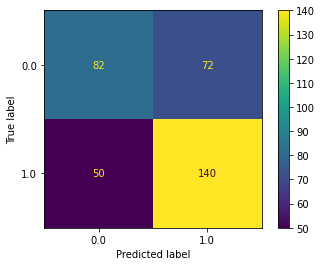

In [31]:
# lets evaluate
train_and_test_final(data, step_nb_qt_pca18)

#### Linear SVM

Its important for Linear SVM to have our data on the same scale!

In [32]:
step_svm_pt_pca18 = [
        ('transformer', PowerTransformer(method='yeo-johnson', standardize=True)),
        ('Dimension_Reduction', PCA(n_components=18)), 
        ('model',LinearSVC())]

train_and_test(data, step_svm_pt_pca18)



Steps taken:
 [('transformer', PowerTransformer()), ('Dimension_Reduction', PCA(n_components=18)), ('model', LinearSVC())]


Avg Accuracy: 0.74
Standard Deviation: 0.04


In [33]:
step_svm_pt_svd18 = [
        ('transformer', PowerTransformer(method='yeo-johnson', standardize=True)),
        ('Dimension_Reduction', TruncatedSVD(n_components=18)), 
        ('model',LinearSVC())]

train_and_test(data, step_svm_pt_svd18)



Steps taken:
 [('transformer', PowerTransformer()), ('Dimension_Reduction', TruncatedSVD(n_components=18)), ('model', LinearSVC())]


Avg Accuracy: 0.74
Standard Deviation: 0.04


In [34]:
step_svm_qt_pca18 = [
        ('scaler', StandardScaler()),
        ('transformer', QuantileTransformer(n_quantiles=90, output_distribution='normal')),
        ('Dimension_Reduction', TruncatedSVD(n_components=18)), 
        ('model',LinearSVC())]

train_and_test(data, step_svm_qt_pca18)



Steps taken:
 [('scaler', StandardScaler()), ('transformer', QuantileTransformer(n_quantiles=90, output_distribution='normal')), ('Dimension_Reduction', TruncatedSVD(n_components=18)), ('model', LinearSVC())]


Avg Accuracy: 0.72
Standard Deviation: 0.04


[('transformer', PowerTransformer()), ('Dimension_Reduction', PCA(n_components=18)), ('model', LinearSVC())]
------------------------------------------------------------
The Accuracy score is:  0.752906976744186
------------------------------------------------------------


precision: [0.6974359  0.82550336]
recall: [0.83950617 0.67582418]
fscore: [0.76190476 0.74320242]
support: [162 182]


G:\Anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
G:\Anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
G:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


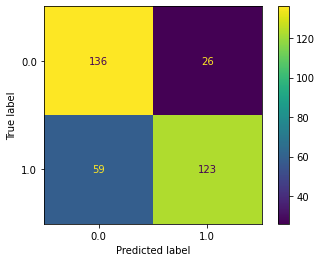

In [35]:
# lets evaluate
train_and_test_final(data, step_svm_pt_pca18)